# Produisez une étude de marché avec R ou Python

# Contexte:
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.
L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables!
Ton objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché. 

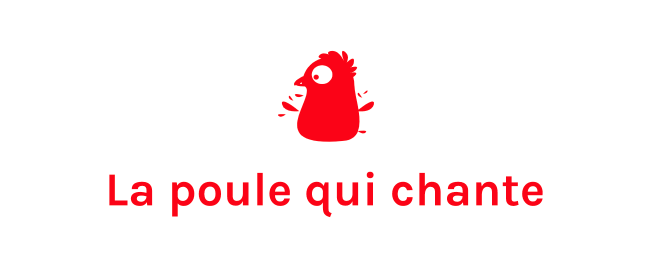

### Notebook n°1: Préparation, nettoyage et analyse exploratoire des données

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [2]:
# Chargement de la librairie seaborn
sns.set() 

### Fichier disponibilité alimentaire 2017

In [3]:
df = pd.read_csv("DisponibiliteAlimentaire_2017.csv", decimal=".", index_col=0)
df.head()

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Code Domaine,,,,,,,,,,,,,
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
# Nombre de lignes et de colonnes du dataframe
df.shape

(176600, 13)

In [5]:
df['Année'].unique()

array([2017], dtype=int64)

In [6]:
# La méthode info nous donne des indications globales 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176600 entries, FBS to FBS
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Domaine                 176600 non-null  object 
 1   Code zone               176600 non-null  int64  
 2   Zone                    176600 non-null  object 
 3   Code Élément            176600 non-null  int64  
 4   Élément                 176600 non-null  object 
 5   Code Produit            176600 non-null  int64  
 6   Produit                 176600 non-null  object 
 7   Code année              176600 non-null  int64  
 8   Année                   176600 non-null  int64  
 9   Unité                   176600 non-null  object 
 10  Valeur                  176600 non-null  float64
 11  Symbole                 176600 non-null  object 
 12  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 18.9+ MB


In [7]:
# On génére les statistiques descriptives du jeu de données
df.describe(include='all')

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [8]:
df.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [9]:
df.describe(include=[object])

,Domaine,Zone,Élément,Produit,Unité,Symbole,Description du Symbole
count,176600,176600,176600,176600,176600,176600,176600
unique,1,174,17,98,4,2,2
top,Nouveaux Bilans Alimentaire,Tchad,Disponibilité intérieure,Maïs et produits,Milliers de tonnes,S,Données standardisées
freq,176600,1416,15905,2593,118487,118487,118487


In [10]:
# Valeurs manquantes
df.isna().mean()

Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

In [11]:
# Vérification des Doublons 
df.duplicated().sum()

0

In [12]:
# Combien de valeurs différentes par colonne
df.nunique()

Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [13]:
df.head()

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Code Domaine,,,,,,,,,,,,,
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [14]:
df.shape

(176600, 13)

In [15]:
df['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [16]:
# Selection de la viande de poulet/ Ceci étant l'objet de notre analyse
dfpoulet = df.loc[df['Produit']=='Viande de Volailles']

In [17]:
df.sort_values(by = 'Valeur', ascending = False)

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Code Domaine,,,,,,,,,,,,,
FBS,Nouveaux Bilans Alimentaire,21,Brésil,5511,Production,2536,"Sucre, canne",2017,2017,Milliers de tonnes,758548.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,21,Brésil,5301,Disponibilité intérieure,2536,"Sucre, canne",2017,2017,Milliers de tonnes,758548.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,41,"Chine, continentale",5511,Production,2605,"Légumes, Autres",2017,2017,Milliers de tonnes,566851.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,41,"Chine, continentale",5301,Disponibilité intérieure,2605,"Légumes, Autres",2017,2017,Milliers de tonnes,557849.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,41,"Chine, continentale",5142,Nourriture,2605,"Légumes, Autres",2017,2017,Milliers de tonnes,473967.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBS,Nouveaux Bilans Alimentaire,216,Thaïlande,5072,Variation de stock,2532,Manioc et produits,2017,2017,Milliers de tonnes,-6528.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,21,Brésil,5072,Variation de stock,2514,Maïs et produits,2017,2017,Milliers de tonnes,-6706.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,231,États-Unis d'Amérique,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-8030.0,S,Données standardisées


In [18]:
dfpoulet.head()

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Code Domaine,,,,,,,,,,,,,
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [19]:
# Pivotage
dfpoulet = dfpoulet.pivot(index = ['Zone'], columns = 'Élément', values = 'Valeur').reset_index()
dfpoulet.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [20]:
dfpoulet.reset_index(drop=True, inplace=True)

In [21]:
# Réduction des dimensions du dataset/ On supprime les colonnes inutiles pour l'analyse
dfpoulet.drop(columns =['Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)','Nourriture', 'Pertes' , 'Résidus','Semences','Traitement','Variation de stock'], inplace=True)
dfpoulet.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,5.0,57.0,NaN,29.0,28.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0
2,Albanie,85.0,47.0,0.0,38.0,13.0
3,Algérie,22.0,277.0,0.0,2.0,275.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0


In [22]:
dfpoulet.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,5.0,57.0,NaN,29.0,28.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0
2,Albanie,85.0,47.0,0.0,38.0,13.0
3,Algérie,22.0,277.0,0.0,2.0,275.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0


In [23]:
# Vérification des types de données
dfpoulet.dtypes

Élément
Zone                                               object
Disponibilité alimentaire (Kcal/personne/jour)    float64
Disponibilité intérieure                          float64
Exportations - Quantité                           float64
Importations - Quantité                           float64
Production                                        float64
dtype: object

In [24]:
# Valeurs manquantes par colonne
dfpoulet.isna().sum()

Élément
Zone                                               0
Disponibilité alimentaire (Kcal/personne/jour)     0
Disponibilité intérieure                           2
Exportations - Quantité                           37
Importations - Quantité                            2
Production                                         4
dtype: int64

In [25]:
# Traitement des valeurs manquantes
dfpoulet.fillna(0, inplace=True) 

In [26]:
# La méthode info nous donne des indications globales
dfpoulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)  172 non-null    float64
 2   Disponibilité intérieure                        172 non-null    float64
 3   Exportations - Quantité                         172 non-null    float64
 4   Importations - Quantité                         172 non-null    float64
 5   Production                                      172 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.2+ KB


In [27]:
# Nombre de lignes et de colonnes du dataframe
dfpoulet.shape

(172, 6)

In [28]:
# On affiche le dataframe
dfpoulet.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,5.0,57.0,0.0,29.0,28.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0
2,Albanie,85.0,47.0,0.0,38.0,13.0
3,Algérie,22.0,277.0,0.0,2.0,275.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0


### Fichier de population

In [29]:
pop = pd.read_csv("Population_2000_2018.csv")
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [30]:
pop.shape

(4411, 15)

In [31]:
pop.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [32]:
pop['Année'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [33]:
# Selection de l'année 2017
popp = pop.loc[pop['Année']==2017]

In [34]:
# Supprimer les colonnes inutiles pour l'analyse
popp.drop(columns =['Code zone','Code Domaine','Domaine','Code Élément','Code année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit','Élément'], inplace=True)
popp

C:\Users\louis\AppData\Local\Temp\ipykernel_60072\2072026836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popp.drop(columns =['Code zone','Code Domaine','Domaine','Code Élément','Code année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit','Élément'], inplace=True)


,Zone,Année,Valeur
17,Afghanistan,2017,36296.113
36,Afrique du Sud,2017,57009.756
55,Albanie,2017,2884.169
74,Algérie,2017,41389.189
93,Allemagne,2017,82658.409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402.484
4352,Viet Nam,2017,94600.648
4371,Yémen,2017,27834.819
4390,Zambie,2017,16853.599


In [35]:
# Pivotage
popp = popp.pivot(index = ['Zone'], columns = 'Année', values = 'Valeur').reset_index()
popp.head()

Année,Zone,2017
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409


In [36]:
# Renommer la colonne '2017' en 'Population en 2017'
popp = popp.rename(columns = {2017:'Population en 2017'})
popp.head()

Année,Zone,Population en 2017
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409


In [37]:
#doublons
popp.duplicated().sum()

0

In [38]:
#Valeurs manquantes
popp.isna().mean()

Année
Zone                  0.0
Population en 2017    0.0
dtype: float64

In [39]:
#Info sur le dataset
popp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zone                236 non-null    object 
 1   Population en 2017  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [40]:
# Affiche les statistiques descriptives du jeu de données
popp.describe()

Année,Population en 2017
count,2.360000e+02
mean,3.198362e+04
std,1.318949e+05
min,7.930000e-01
25%,3.803032e+02
50%,5.203511e+03
75%,1.930842e+04
max,1.421022e+06


In [41]:
# On affiche le nouveau dataframe
popp.head()

Année,Zone,Population en 2017
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409


In [42]:
#Nombre de lignes et de colonnes du dataframe 
popp.shape

(236, 2)

In [43]:
dfpoulet.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,5.0,57.0,0.0,29.0,28.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0
2,Albanie,85.0,47.0,0.0,38.0,13.0
3,Algérie,22.0,277.0,0.0,2.0,275.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0


In [44]:
#Jointure des fichiers
Disponibilite_par_population = pd.merge(dfpoulet, popp, on = 'Zone', how = 'inner')
Disponibilite_par_population.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296.113
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009.756
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884.169
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389.189
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658.409


In [45]:
# La population était inscrit en milliers d'habitants => je la multiplie par 1000
Disponibilite_par_population['Population en 2017']=Disponibilite_par_population['Population en 2017']*1000
Disponibilite_par_population.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296113.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009756.0
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884169.0
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389189.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0


In [46]:
# La fonction .corr() est utilisé pour trouver la corrélation par paires de toutes les colonnes du Dataframe. Toutes les valeurs NaN sont automatiquement exclues. Tout type de données ou colonne non numérique dans le Dataframe est ignoré.
Disponibilite_par_population.corr()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
Disponibilité alimentaire (Kcal/personne/jour),1.000000,0.210961,0.265371,0.175009,0.223209,-0.070650
Disponibilité intérieure,0.210961,1.000000,0.685745,0.263670,0.988052,0.675866
Exportations - Quantité,0.265371,0.685745,1.000000,0.160605,0.777650,0.208899
Importations - Quantité,0.175009,0.263670,0.160605,1.000000,0.195613,0.151554
Production,0.223209,0.988052,0.777650,0.195613,1.000000,0.619022
Population en 2017,-0.070650,0.675866,0.208899,0.151554,0.619022,1.000000


#### On explore les données

In [47]:
# Les Etats Unis, la Chine et le Brésil produisent le plus de poulet. La russie et l'inde complete le top 5 
Disponibilite_par_population.sort_values(by = 'Production', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
169,États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,21914.0,3.250848e+08
34,"Chine, continentale",59.0,18161.0,576.0,452.0,18236.0,1.421022e+09
21,Brésil,204.0,9982.0,4223.0,3.0,14201.0,2.078338e+08
52,Fédération de Russie,104.0,4556.0,115.0,226.0,4444.0,1.455301e+08
66,Inde,7.0,3661.0,4.0,0.0,3545.0,1.338677e+09
...,...,...,...,...,...,...,...
44,Dominique,150.0,4.0,0.0,4.0,0.0,7.145800e+04
130,République démocratique populaire lao,41.0,0.0,0.0,0.0,0.0,6.953035e+06
133,Saint-Kitts-et-Nevis,190.0,4.0,0.0,4.0,0.0,5.204500e+04
134,Saint-Vincent-et-les Grenadines,243.0,8.0,0.0,9.0,0.0,1.098270e+05


In [48]:
# Le brésil et les Etats Unis exportent le plus de poulet
Disponibilite_par_population.sort_values(by = 'Exportations - Quantité', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
21,Brésil,204.0,9982.0,4223.0,3.0,14201.0,207833823.0
169,États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,21914.0,325084756.0
117,Pays-Bas,70.0,372.0,1418.0,608.0,1100.0,17021347.0
119,Pologne,107.0,1156.0,1025.0,55.0,2351.0,37953180.0
151,Thaïlande,47.0,881.0,796.0,2.0,1676.0,69209810.0
...,...,...,...,...,...,...,...
69,Iraq,52.0,566.0,0.0,470.0,96.0,37552781.0
67,Indonésie,25.0,2323.0,0.0,1.0,2301.0,264650963.0
63,Haïti,31.0,98.0,0.0,89.0,9.0,10982366.0
61,Guyana,165.0,32.0,0.0,0.0,31.0,775222.0


In [49]:
Disponibilite_par_population.sort_values(by = 'Importations - Quantité', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
75,Japon,67.0,2415.0,10.0,1069.0,2215.0,127502725.0
98,Mexique,123.0,4219.0,9.0,972.0,3249.0,124777324.0
31,Chine - RAS de Hong-Kong,210.0,280.0,663.0,907.0,24.0,7306322.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,120.0,2234.0,359.0,779.0,1814.0,66727461.0
...,...,...,...,...,...,...,...
130,République démocratique populaire lao,41.0,0.0,0.0,0.0,0.0,6953035.0
131,République populaire démocratique de Corée,8.0,43.0,0.0,0.0,43.0,25429825.0
14,Bangladesh,7.0,250.0,0.0,0.0,249.0,159685424.0
143,Sri Lanka,26.0,192.0,2.0,0.0,192.0,21128032.0


In [50]:
Disponibilite_par_population.sort_values(by = 'Disponibilité intérieure', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
169,États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,21914.0,3.250848e+08
34,"Chine, continentale",59.0,18161.0,576.0,452.0,18236.0,1.421022e+09
21,Brésil,204.0,9982.0,4223.0,3.0,14201.0,2.078338e+08
52,Fédération de Russie,104.0,4556.0,115.0,226.0,4444.0,1.455301e+08
98,Mexique,123.0,4219.0,9.0,972.0,3249.0,1.247773e+08
...,...,...,...,...,...,...,...
171,Îles Salomon,18.0,3.0,0.0,6.0,0.0,6.360390e+05
137,Sao Tomé-et-Principe,33.0,2.0,0.0,2.0,1.0,2.070890e+05
80,Kiribati,63.0,2.0,0.0,1.0,1.0,1.141580e+05
113,Ouzbékistan,6.0,0.0,0.0,0.0,0.0,3.195978e+07


In [51]:
Disponibilite_par_population.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
134,Saint-Vincent-et-les Grenadines,243.0,8.0,0.0,9.0,0.0,109827.0
135,Sainte-Lucie,241.0,11.0,0.0,10.0,1.0,180954.0
72,Israël,234.0,636.0,3.0,0.0,629.0,8243848.0
6,Antigua-et-Barbuda,233.0,7.0,0.0,7.0,0.0,95426.0
169,États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,21914.0,325084756.0
...,...,...,...,...,...,...,...
105,Niger,3.0,21.0,0.0,3.0,19.0,21602382.0
78,Kenya,2.0,35.0,0.0,0.0,35.0,50221142.0
149,Tchad,2.0,7.0,0.0,1.0,6.0,15016753.0
106,Nigéria,2.0,202.0,0.0,0.0,201.0,190873244.0


In [52]:
# Chine, inde et USA sont les pays les plus peuplés
Disponibilite_par_population.sort_values(by = 'Population en 2017', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017
34,"Chine, continentale",59.0,18161.0,576.0,452.0,18236.0,1.421022e+09
66,Inde,7.0,3661.0,4.0,0.0,3545.0,1.338677e+09
169,États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,21914.0,3.250848e+08
67,Indonésie,25.0,2323.0,0.0,1.0,2301.0,2.646510e+08
114,Pakistan,20.0,1282.0,4.0,2.0,1281.0,2.079062e+08
...,...,...,...,...,...,...,...
56,Grenade,192.0,8.0,0.0,7.0,1.0,1.108740e+05
134,Saint-Vincent-et-les Grenadines,243.0,8.0,0.0,9.0,0.0,1.098270e+05
6,Antigua-et-Barbuda,233.0,7.0,0.0,7.0,0.0,9.542600e+04
44,Dominique,150.0,4.0,0.0,4.0,0.0,7.145800e+04


### Fichier PIB

In [53]:
pib = pd.read_csv("pib.csv")
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352020,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,380851.444100,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,8,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,13019.729860,X,Ciffre de sources internationales,NaN


In [54]:
# Infos sur le dataframe
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            422 non-null    object 
 1   Domaine                 422 non-null    object 
 2   Code zone (M49)         422 non-null    int64  
 3   Zone                    422 non-null    object 
 4   Code Élément            422 non-null    int64  
 5   Élément                 422 non-null    object 
 6   Code Produit            422 non-null    int64  
 7   Produit                 422 non-null    object 
 8   Code année              422 non-null    int64  
 9   Année                   422 non-null    int64  
 10  Unité                   422 non-null    object 
 11  Valeur                  422 non-null    float64
 12  Symbole                 422 non-null    object 
 13  Description du Symbole  422 non-null    object 
 14  Note                    0 non-null      fl

In [55]:
# Statistiques descriptives sur le jeu de données
pib.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,422.000000,422.000000,422.0,422.0,422.0,4.220000e+02,0.0
mean,429.407583,6114.500000,22008.0,2017.0,2017.0,2.298944e+05,NaN
std,250.939413,4.505341,0.0,0.0,0.0,1.341679e+06,NaN
min,4.000000,6110.000000,22008.0,2017.0,2017.0,4.529575e+01,NaN
25%,209.000000,6110.000000,22008.0,2017.0,2017.0,3.081183e+03,NaN
50%,430.000000,6114.500000,22008.0,2017.0,2017.0,1.269970e+04,NaN
75%,642.750000,6119.000000,22008.0,2017.0,2017.0,4.855695e+04,NaN
max,894.000000,6119.000000,22008.0,2017.0,2017.0,1.947734e+07,NaN


In [56]:
# Valeurs manquantes par colonne
pib.isna().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      422
dtype: int64

In [57]:
# Vérification des types de données
pib.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [58]:
# Doublons
pib.duplicated().sum()

0

In [59]:
# Valeurs manquantes
pib.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

In [60]:
# Nombre de lignes et de colonnes du dataframe
pib.shape

(422, 15)

In [61]:
# Pivotage
pib = pib.pivot(index = ['Zone'], columns = 'Élément', values = 'Valeur').reset_index()
pib.head()

Élément,Zone,Valeur US $,Valeur US $ par habitant
0,Afghanistan,1.889635e+04,530.149831
1,Afrique du Sud,3.808514e+05,6723.928582
2,Albanie,1.301973e+04,4521.752219
3,Algérie,1.700970e+05,4134.936054
4,Allemagne,3.690849e+06,44670.222288


In [62]:
# Nombre de lignes et de colonnes du dataframe
pib.shape

(211, 3)

In [63]:
# Liste des pays avec le pib par habitant le plus élevé
pib.sort_values(by = 'Valeur US $ par habitant', ascending = False)

Élément,Zone,Valeur US $,Valeur US $ par habitant
114,Monaco,6431.276067,173611.814788
99,Liechtenstein,6474.310910,170875.739925
22,Bermudes,7142.316000,112877.376531
101,Luxembourg,65712.180340,110203.008202
175,Suisse,704478.517000,83353.597572
...,...,...,...
154,République démocratique du Congo,37642.464500,446.618447
150,République centrafricaine,2072.349974,414.740323
171,Somalie,5609.009995,377.349744
173,Soudan du Sud,3571.364985,335.080621


In [64]:
# Liste des pays avec le pib le plus élevé
pib.sort_values(by = 'Valeur US $', ascending = False)

Élément,Zone,Valeur US $,Valeur US $ par habitant
203,États-Unis d'Amérique,1.947734e+07,59059.596403
39,Chine,1.270220e+07,8808.489506
42,"Chine, continentale",1.231049e+07,8729.136932
87,Japon,4.930837e+06,38928.952602
4,Allemagne,3.690849e+06,44670.222288
...,...,...,...
207,Îles Marshall,2.130616e+02,4515.261195
92,Kiribati,1.881820e+02,1563.467140
121,Nauru,1.287434e+02,11020.663089
116,Montserrat,5.966667e+01,12697.737108


In [65]:
#Jointure des fichiers
dispo = pd.merge(Disponibilite_par_population, pib, on = 'Zone', how = 'inner')
dispo.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296113.0,1.889635e+04,530.149831
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009756.0,3.808514e+05,6723.928582
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884169.0,1.301973e+04,4521.752219
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389189.0,1.700970e+05,4134.936054
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0,3.690849e+06,44670.222288


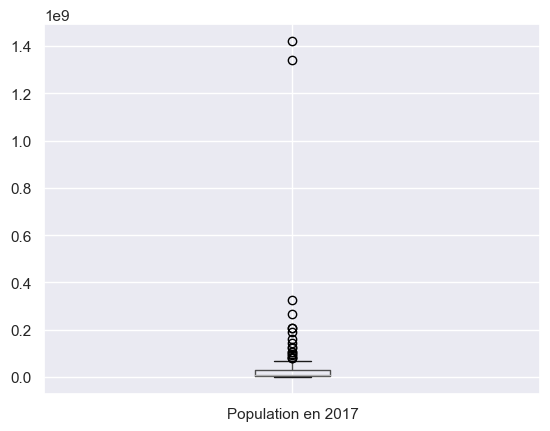

In [66]:
# Valeurs aberrantes - L'inde et la chine sont les 2 pays les plus peuplés de loin. Les etats-unis sont 3eme
Disponibilite_par_population.boxplot(column=['Population en 2017']) 
plt.show()

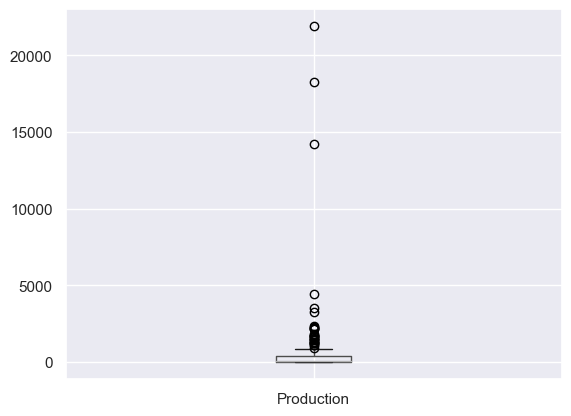

In [67]:
# Valeurs aberrantes - Les états unis, la chine et le brésil (dans cet ordre) produisent le plus de poulet 
Disponibilite_par_population.boxplot(column=['Production']) 
plt.show()

In [68]:
# On décide d'écarter de notre analyse les etats unis, l'inde et la chine 
# Ces pays sont très prisées, disposent d'une population très importante, et produisent énormement de poulets
dispo = dispo[dispo['Zone'] !='Inde']
dispo = dispo[dispo['Zone'] !='Chine, continentale']

In [69]:
dispo = dispo[dispo['Zone'] !="États-Unis d'Amérique"]
dispo = dispo[dispo['Zone'] !='Brésil']

In [70]:
# Vérification
dispo.sort_values(by = 'Population en 2017', ascending = False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
66,Indonésie,25.0,2323.0,0.0,1.0,2301.0,264650963.0,1.015619e+06,3839.785074
113,Pakistan,20.0,1282.0,4.0,2.0,1281.0,207906209.0,3.371368e+05,1558.080077
105,Nigéria,2.0,202.0,0.0,0.0,201.0,190873244.0,3.757447e+05,1941.873933
14,Bangladesh,7.0,250.0,0.0,0.0,249.0,159685424.0,2.889580e+05,1785.962903
51,Fédération de Russie,104.0,4556.0,115.0,226.0,4444.0,145530082.0,1.574199e+06,10822.770247
...,...,...,...,...,...,...,...,...,...
55,Grenade,192.0,8.0,0.0,7.0,1.0,110874.0,1.125686e+03,9309.267844
132,Saint-Vincent-et-les Grenadines,243.0,8.0,0.0,9.0,0.0,109827.0,8.476185e+02,8030.568916
6,Antigua-et-Barbuda,233.0,7.0,0.0,7.0,0.0,95426.0,1.467978e+03,16110.556284
43,Dominique,150.0,4.0,0.0,4.0,0.0,71458.0,5.207000e+02,7395.991648


In [71]:
dispo.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296113.0,1.889635e+04,530.149831
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009756.0,3.808514e+05,6723.928582
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884169.0,1.301973e+04,4521.752219
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389189.0,1.700970e+05,4134.936054
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0,3.690849e+06,44670.222288


In [72]:
dispo.shape

(166, 9)

#### Analyse des corrélations entre les variables 

In [73]:
# Test de significativité de la corrélation
# Le résultat de la fonction corr() est une table de coefficients de corrélation entre chaque variable et les autres. 
dispo.corr()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
Disponibilité alimentaire (Kcal/personne/jour),1.000000,0.199587,0.143241,0.190481,0.189048,-0.175633,0.116817,0.368102
Disponibilité intérieure,0.199587,1.000000,0.301495,0.565588,0.966382,0.664754,0.642219,0.081028
Exportations - Quantité,0.143241,0.301495,1.000000,0.377571,0.437817,0.155768,0.408323,0.230714
Importations - Quantité,0.190481,0.565588,0.377571,1.000000,0.436246,0.295779,0.688537,0.252173
Production,0.189048,0.966382,0.437817,0.436246,1.000000,0.655360,0.628581,0.080134
Population en 2017,-0.175633,0.664754,0.155768,0.295779,0.655360,1.000000,0.465691,-0.099088
Valeur US $,0.116817,0.642219,0.408323,0.688537,0.628581,0.465691,1.000000,0.368938
Valeur US $ par habitant,0.368102,0.081028,0.230714,0.252173,0.080134,-0.099088,0.368938,1.000000


In [74]:
sns.heatmap(dispo.corr()).set_title('Carte de corrélation de Pearson')

Text(0.5, 1.0, 'Carte de corrélation de Pearson')

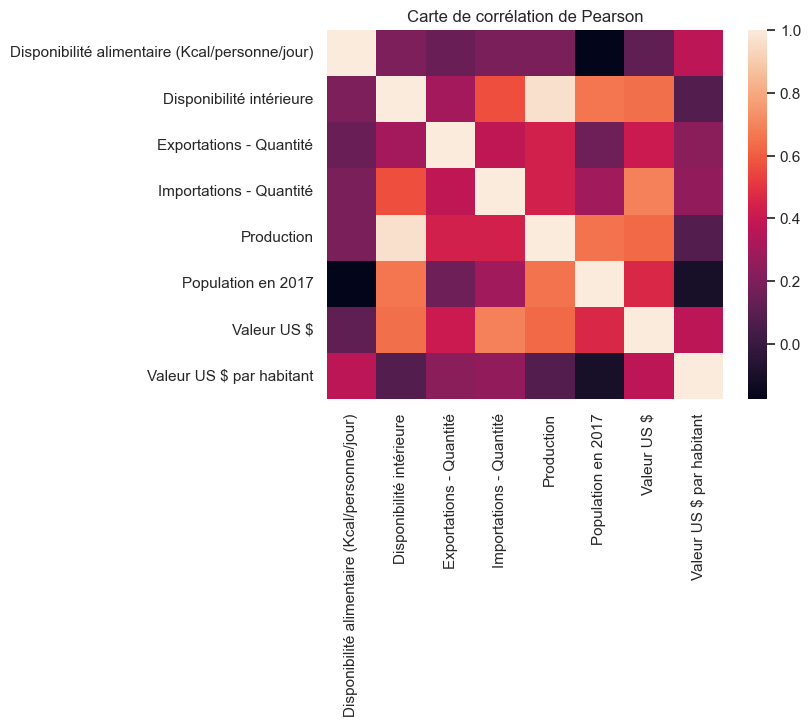

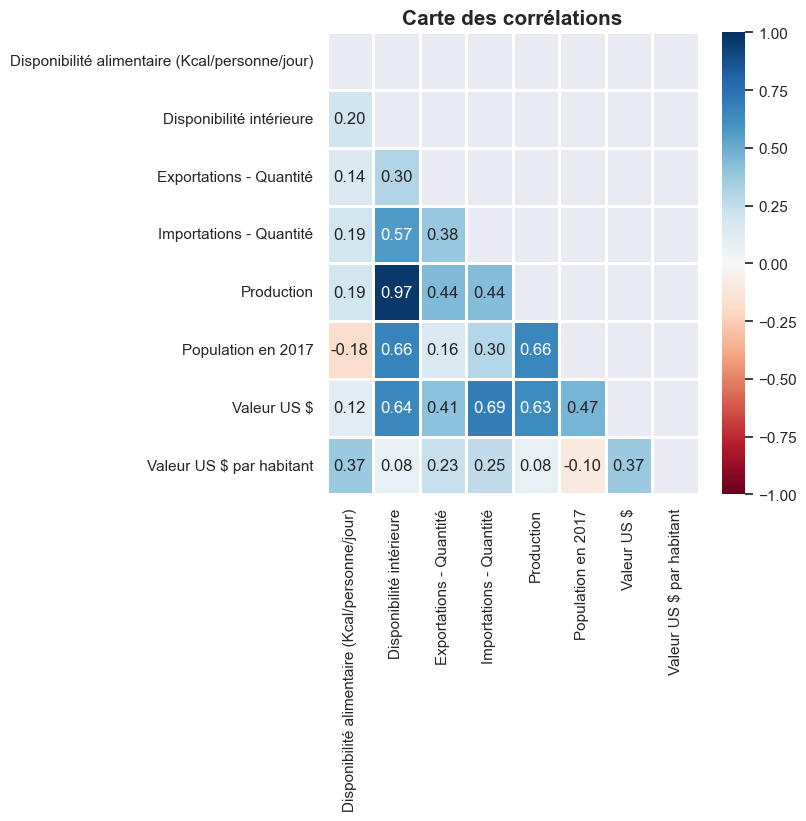

In [75]:
plt.figure(figsize=(6,6))
mask = np.triu(np.ones_like(dispo.corr(), dtype=bool))
sns.heatmap(dispo.corr(), mask=mask, center=0, cmap='RdBu', 
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

In [76]:
def correlation_matrix(df):
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
    plt.show()

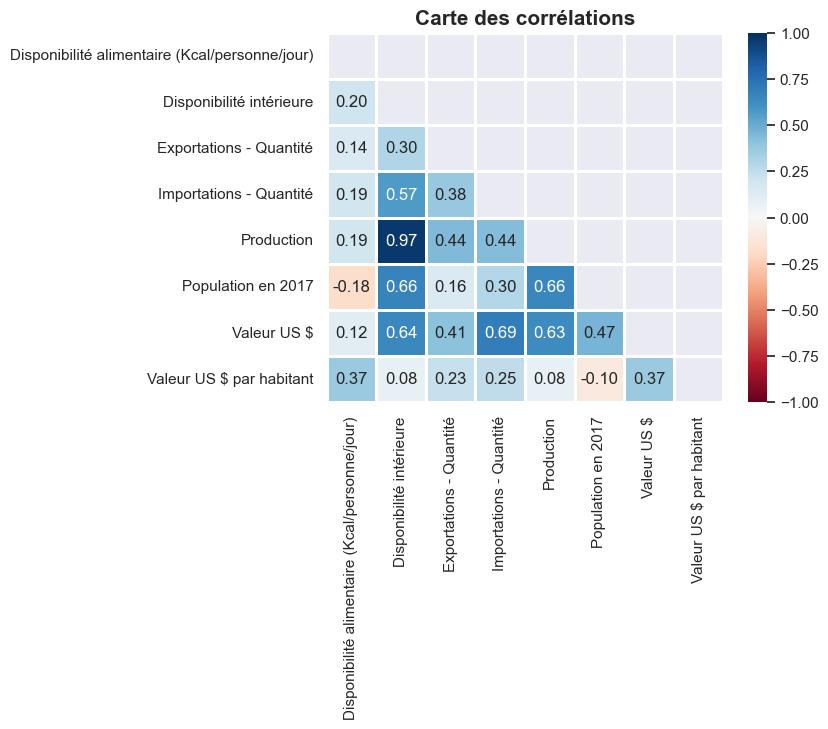

In [77]:
correlation_matrix(dispo)

###### Dans ce premier notebook, nous avons procédé au nettoyage et à l'analyse exploratoire des données.
En autre, nous avons:
- Vérifier le type de nos données
- Traiter les valeurs manquantes
- Detecter les valeurs abérrantes
- Analyser les corrélations entre les variables
- Gérer les doublons
- Utiliser la fonction pivot table afin d'éviter la répétition des données du dataframe. Permet de remodeler nos données
- Selectionner l'année 2017 
- Réduit les dimension de nos jeux de données en gardant seulement les variables utiles à notre analyse

### Conclusion

Nous avons  joint notre fichier de disponibilité alimentaire avec notre fichier population et pib.
Notre fichier dispo est prêt.
Nous allons maintenant passer à la partie analyse oû l'on verra le/les clusterings effectués, et les différentes visualisations associées ;

In [78]:
# On exporte le dataframe final
dispo.to_csv("dispo.csv", encoding='utf-8', index=False)

## ACP, diagramme d'éboulis, cercle des corrélations et projection 

### Fractionnement des données

In [79]:
df = pd.read_csv("dispo.csv", decimal=".", index_col=0)
df.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
Zone,,,,,,,,
Afghanistan,5.0,57.0,0.0,29.0,28.0,36296113.0,1.889635e+04,530.149831
Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009756.0,3.808514e+05,6723.928582
Albanie,85.0,47.0,0.0,38.0,13.0,2884169.0,1.301973e+04,4521.752219
Algérie,22.0,277.0,0.0,2.0,275.0,41389189.0,1.700970e+05,4134.936054
Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0,3.690849e+06,44670.222288


In [80]:
X = df.values
X[:5]

array([[5.00000000e+00, 5.70000000e+01, 0.00000000e+00, 2.90000000e+01,
        2.80000000e+01, 3.62961130e+07, 1.88963520e+04, 5.30149831e+02],
       [1.43000000e+02, 2.11800000e+03, 6.30000000e+01, 5.14000000e+02,
        1.66700000e+03, 5.70097560e+07, 3.80851444e+05, 6.72392858e+03],
       [8.50000000e+01, 4.70000000e+01, 0.00000000e+00, 3.80000000e+01,
        1.30000000e+01, 2.88416900e+06, 1.30197299e+04, 4.52175222e+03],
       [2.20000000e+01, 2.77000000e+02, 0.00000000e+00, 2.00000000e+00,
        2.75000000e+02, 4.13891890e+07, 1.70096987e+05, 4.13493605e+03],
       [7.10000000e+01, 1.73900000e+03, 6.46000000e+02, 8.42000000e+02,
        1.51400000e+03, 8.26584090e+07, 3.69084915e+06, 4.46702223e+04]])

In [81]:
# C'est bien un np.array :
type(X)

numpy.ndarray

In [82]:
# La forme de cette matrice est conforme à nos attentes :
X.shape

(166, 8)

In [83]:
# On enregistre les noms des pays dans une variable pays
pays = df.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=166)

In [84]:
# et nos colonnes, nos features, dans une variable features :
features = df.columns
features

Index(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Production', 'Population en 2017',
       'Valeur US $', 'Valeur US $ par habitant'],
      dtype='object')

### Scaling

In [85]:
scaler = StandardScaler()

In [86]:
scaler.fit(X)

StandardScaler()

In [87]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-1.15061144, -0.47150242, -0.32660384, -0.30043435, -0.49502897,
         0.30125567, -0.38006412, -0.69047781],
       [ 1.18011691,  2.39873771,  0.10444398,  2.36961417,  1.84584478,
         0.82186898,  0.19935407, -0.36358918],
       [ 0.20053543, -0.48542886, -0.32660384, -0.25088706, -0.51645247,
        -0.53851465, -0.38947143, -0.47981329],
       [-0.86349273, -0.16512065, -0.32660384, -0.44907623, -0.14225544,
         0.42926421, -0.13802195, -0.50022826],
       [-0.03591527,  1.87092548,  4.09334682,  4.17533771,  1.62732515,
         1.46651802,  5.49800279,  1.63909971]])

In [88]:
X_scaled = scaler.fit_transform(X)

In [89]:
# On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### ACP

In [90]:
# Nous allons travailler que sur les 6 premières composantes
n_components = 6

In [91]:
# On instancie notre ACP :
pca = PCA(n_components=n_components)

In [92]:
# On l'entraine sur les données scalées :
pca.fit(X_scaled)

PCA(n_components=6)

### Variance expliquée et diagramme d'éboulis

In [93]:
pca.explained_variance_ratio_

array([0.46823421, 0.19558917, 0.1064486 , 0.09072376, 0.07282047,
       0.03646982])

In [94]:
# Enregistrons cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([46.82, 19.56, 10.64,  9.07,  7.28,  3.65])

In [95]:
scree_cum = scree.cumsum().round()
scree_cum

array([47., 66., 77., 86., 93., 97.])

In [96]:
# Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

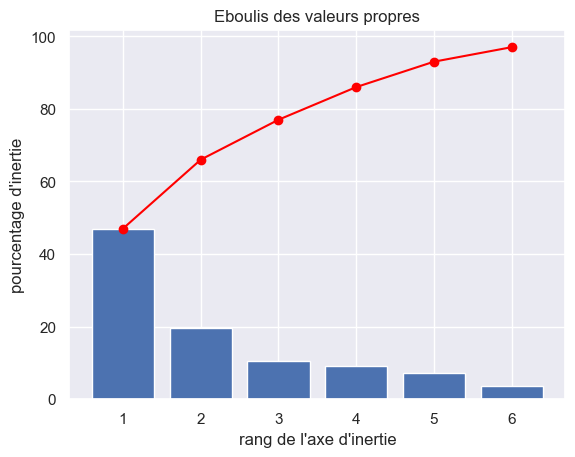

In [97]:
# On peut enfin l'afficher de facon graphique 
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### Composants

In [98]:
pcs = pca.components_
pcs

array([[ 0.12341962,  0.46959106,  0.28040196,  0.37712828,  0.46389829,
         0.34152741,  0.43538775,  0.1483096 ],
       [-0.54249185,  0.17206089, -0.20822005, -0.16065887,  0.16919701,
         0.45604723, -0.09161628, -0.60160663],
       [-0.68583226, -0.3000312 ,  0.44688789,  0.2704697 , -0.26349819,
        -0.05429826,  0.26831271,  0.14960426],
       [ 0.16574015, -0.01330751,  0.79145904, -0.24423253,  0.19396253,
        -0.14796964, -0.29370205, -0.37485836],
       [-0.17474428, -0.01344228,  0.10697023, -0.68409599,  0.17246191,
         0.31852409, -0.04922409,  0.59685013],
       [ 0.32762129, -0.32392007,  0.14571295,  0.20081824, -0.37803731,
         0.74055831, -0.18645572, -0.00867724]])

In [99]:
# Même chose version pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.123420,0.469591,0.280402,0.377128,0.463898,0.341527,0.435388,0.148310
1,-0.542492,0.172061,-0.208220,-0.160659,0.169197,0.456047,-0.091616,-0.601607
2,-0.685832,-0.300031,0.446888,0.270470,-0.263498,-0.054298,0.268313,0.149604
3,0.165740,-0.013308,0.791459,-0.244233,0.193963,-0.147970,-0.293702,-0.374858
4,-0.174744,-0.013442,0.106970,-0.684096,0.172462,0.318524,-0.049224,0.596850
5,0.327621,-0.323920,0.145713,0.200818,-0.378037,0.740558,-0.186456,-0.008677


In [100]:
# Intéressant mais pas très clair.. Continuons le travail
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
F1,0.12,0.47,0.28,0.38,0.46,0.34,0.44,0.15
F2,-0.54,0.17,-0.21,-0.16,0.17,0.46,-0.09,-0.60
F3,-0.69,-0.30,0.45,0.27,-0.26,-0.05,0.27,0.15
F4,0.17,-0.01,0.79,-0.24,0.19,-0.15,-0.29,-0.37
F5,-0.17,-0.01,0.11,-0.68,0.17,0.32,-0.05,0.60
F6,0.33,-0.32,0.15,0.20,-0.38,0.74,-0.19,-0.01


In [101]:
pcs.T

,F1,F2,F3,F4,F5,F6
Disponibilité alimentaire (Kcal/personne/jour),0.123420,-0.542492,-0.685832,0.165740,-0.174744,0.327621
Disponibilité intérieure,0.469591,0.172061,-0.300031,-0.013308,-0.013442,-0.323920
Exportations - Quantité,0.280402,-0.208220,0.446888,0.791459,0.106970,0.145713
Importations - Quantité,0.377128,-0.160659,0.270470,-0.244233,-0.684096,0.200818
Production,0.463898,0.169197,-0.263498,0.193963,0.172462,-0.378037
Population en 2017,0.341527,0.456047,-0.054298,-0.147970,0.318524,0.740558
Valeur US $,0.435388,-0.091616,0.268313,-0.293702,-0.049224,-0.186456
Valeur US $ par habitant,0.148310,-0.601607,0.149604,-0.374858,0.596850,-0.008677


In [102]:
# Représentation graphique
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

<AxesSubplot:>

### Graphique de corrélation

In [103]:
x, y = 0,1

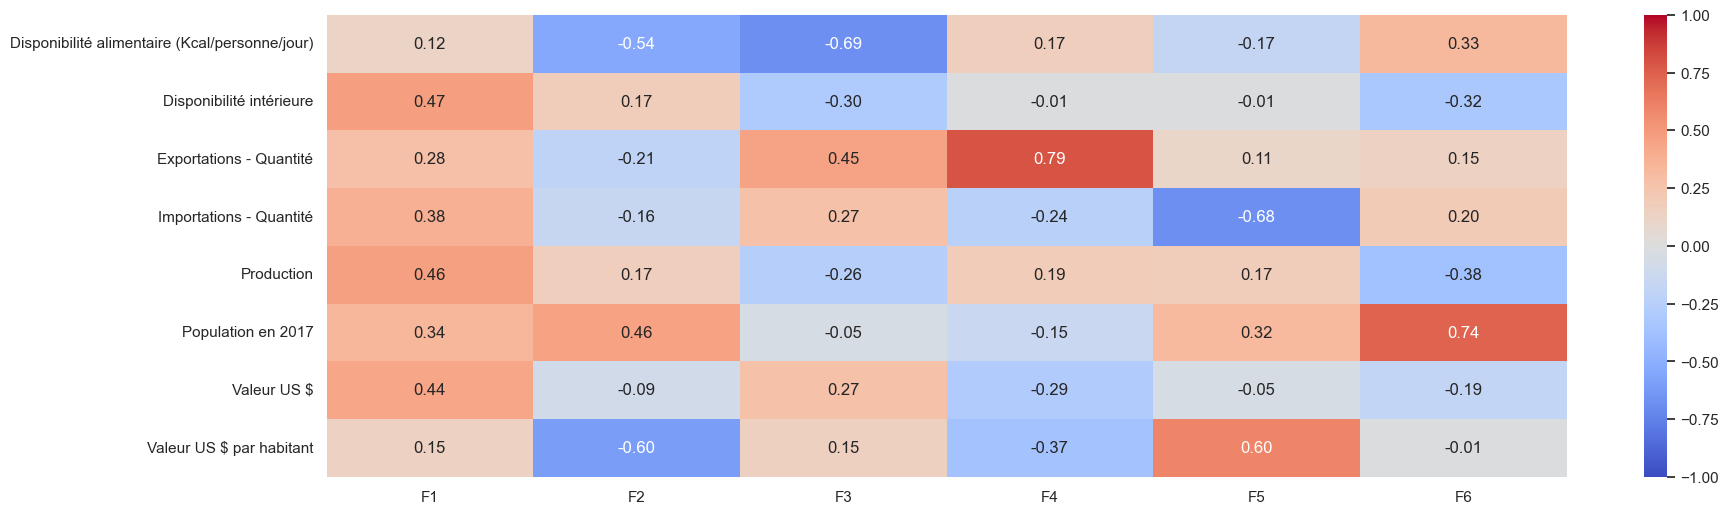

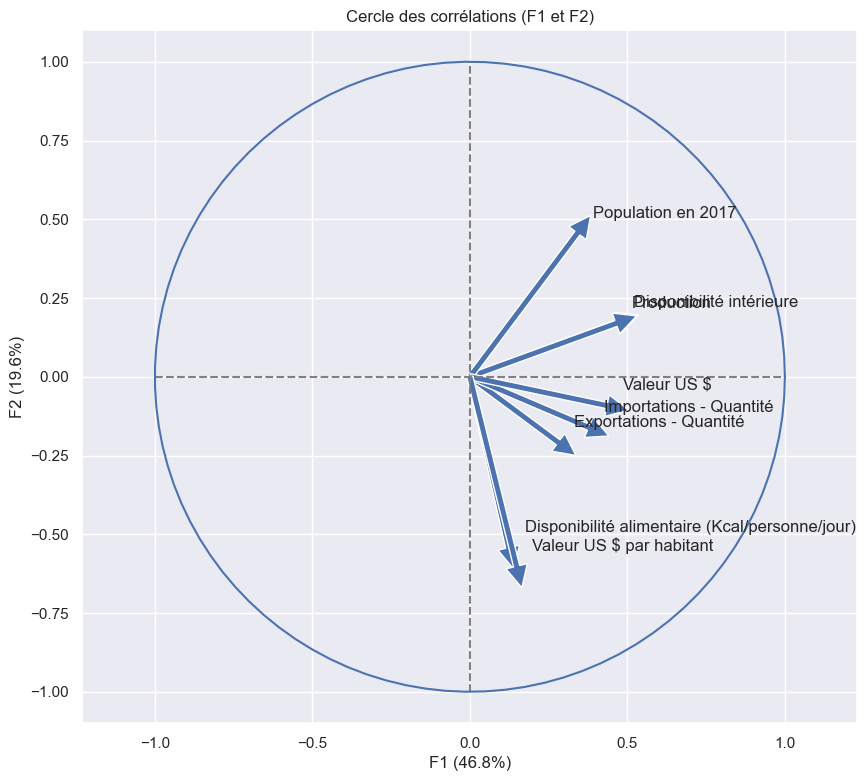

In [104]:
# Pour la partie graphique
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [105]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [106]:
x_y = (0,1)
x_y

(0, 1)

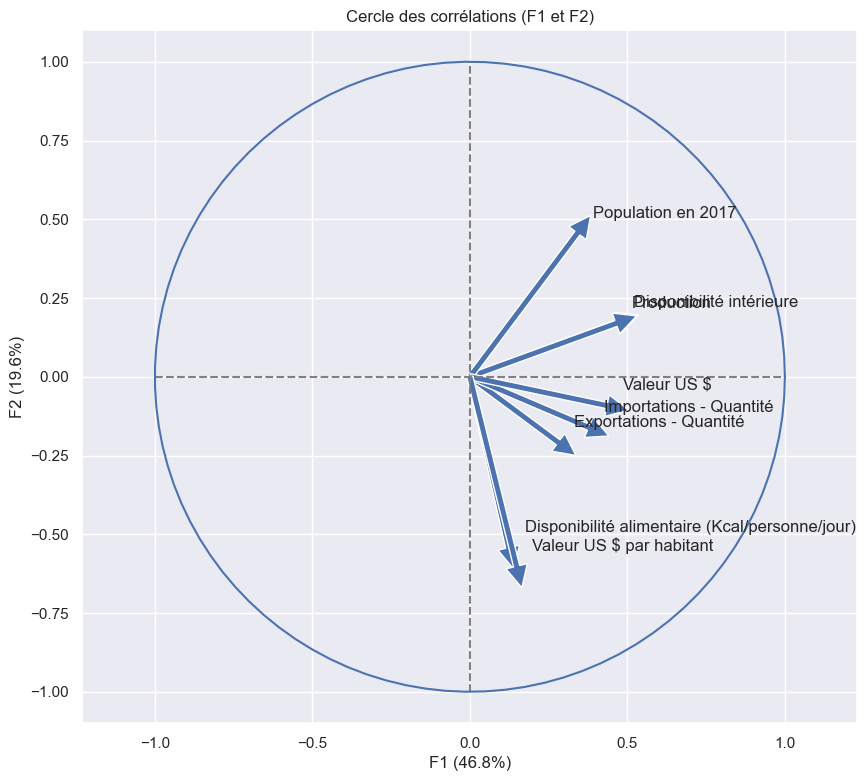

In [107]:
correlation_graph(pca, x_y, features)

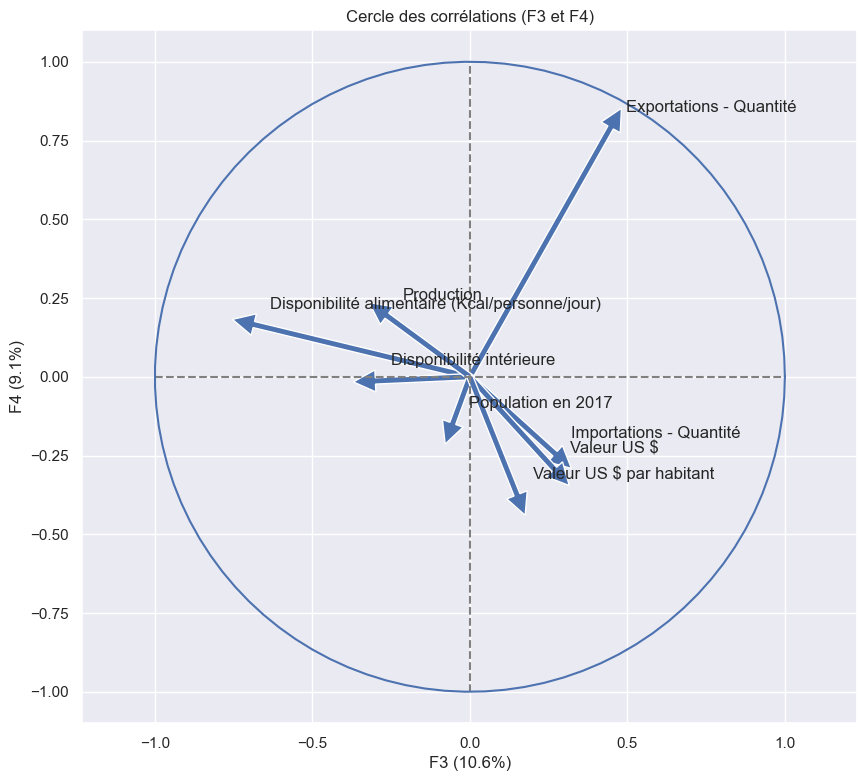

In [108]:
# Essayons pour F3 et F4
correlation_graph(pca, (2,3), features)

### Projection

In [109]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-9.62939767e-01,  1.16318859e+00,  6.12185314e-01,
        -1.39682483e-01, -4.83002788e-03,  1.54934572e-01],
       [ 3.36485777e+00,  2.57674351e-01, -1.37338289e+00,
        -1.82453937e-02, -1.49503263e+00, -2.24593414e-02],
       [-1.05363095e+00, -9.26290145e-02, -2.16660058e-01,
         1.16239816e-01, -4.19626713e-01, -1.81384126e-03],
       [-4.98719102e-01,  1.06546176e+00,  2.76642135e-01,
        -1.52790830e-01,  2.45814424e-01,  3.45628081e-02],
       [ 7.48918440e+00, -1.72738481e+00,  3.63383903e+00,
         5.85481054e-02, -9.81903431e-01,  2.48636196e-01]])

In [110]:
# Rappelons que :
x_y

(0, 1)

In [111]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

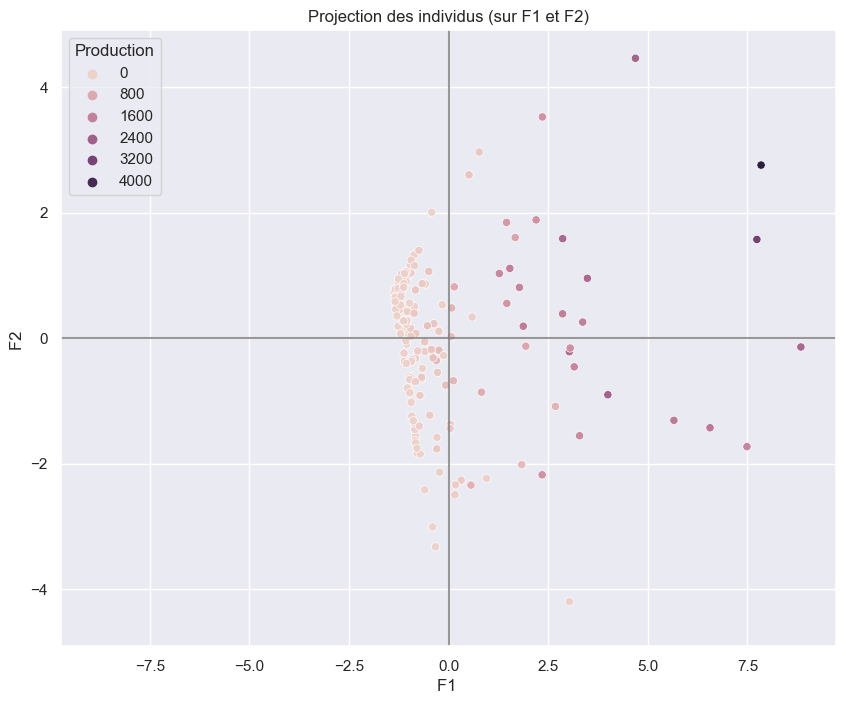

In [112]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['Production'])

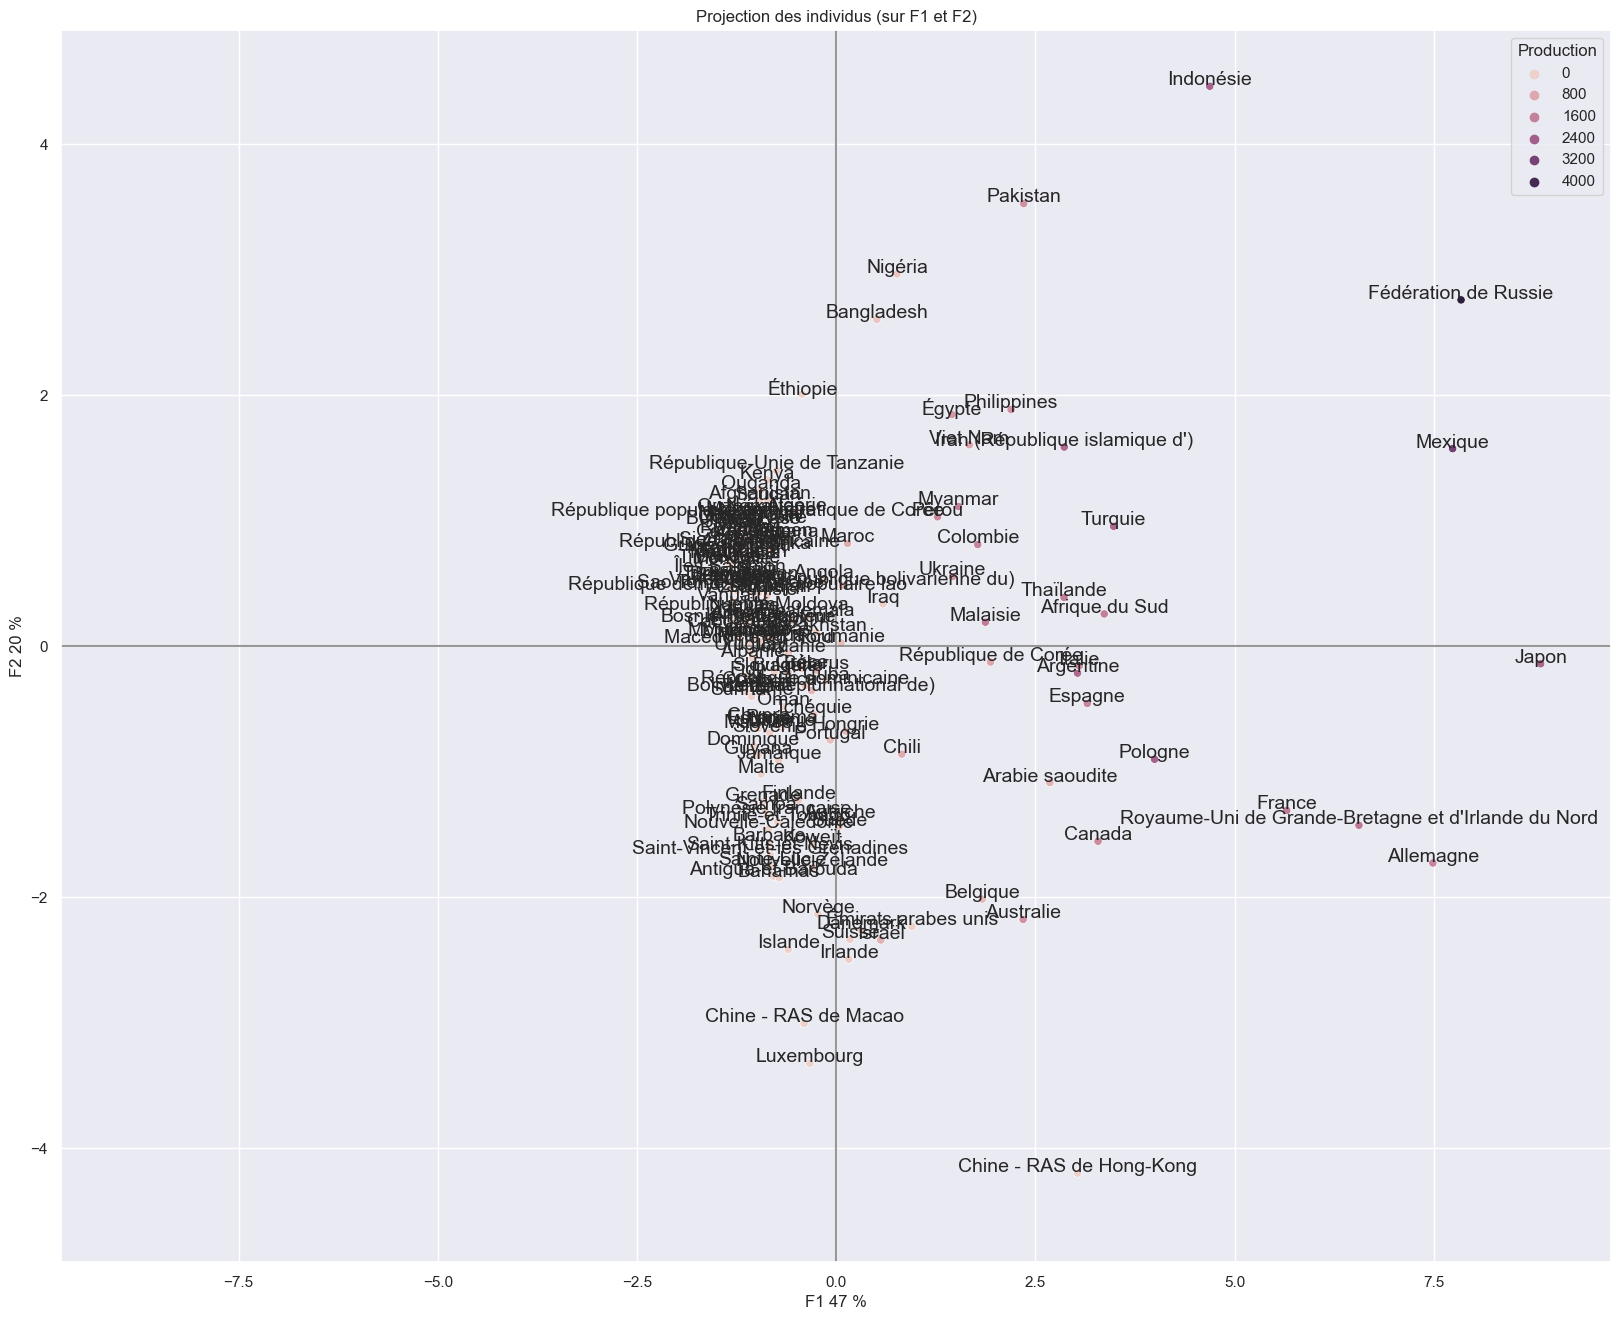

In [113]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16), clusters=df['Production'], marker="o")

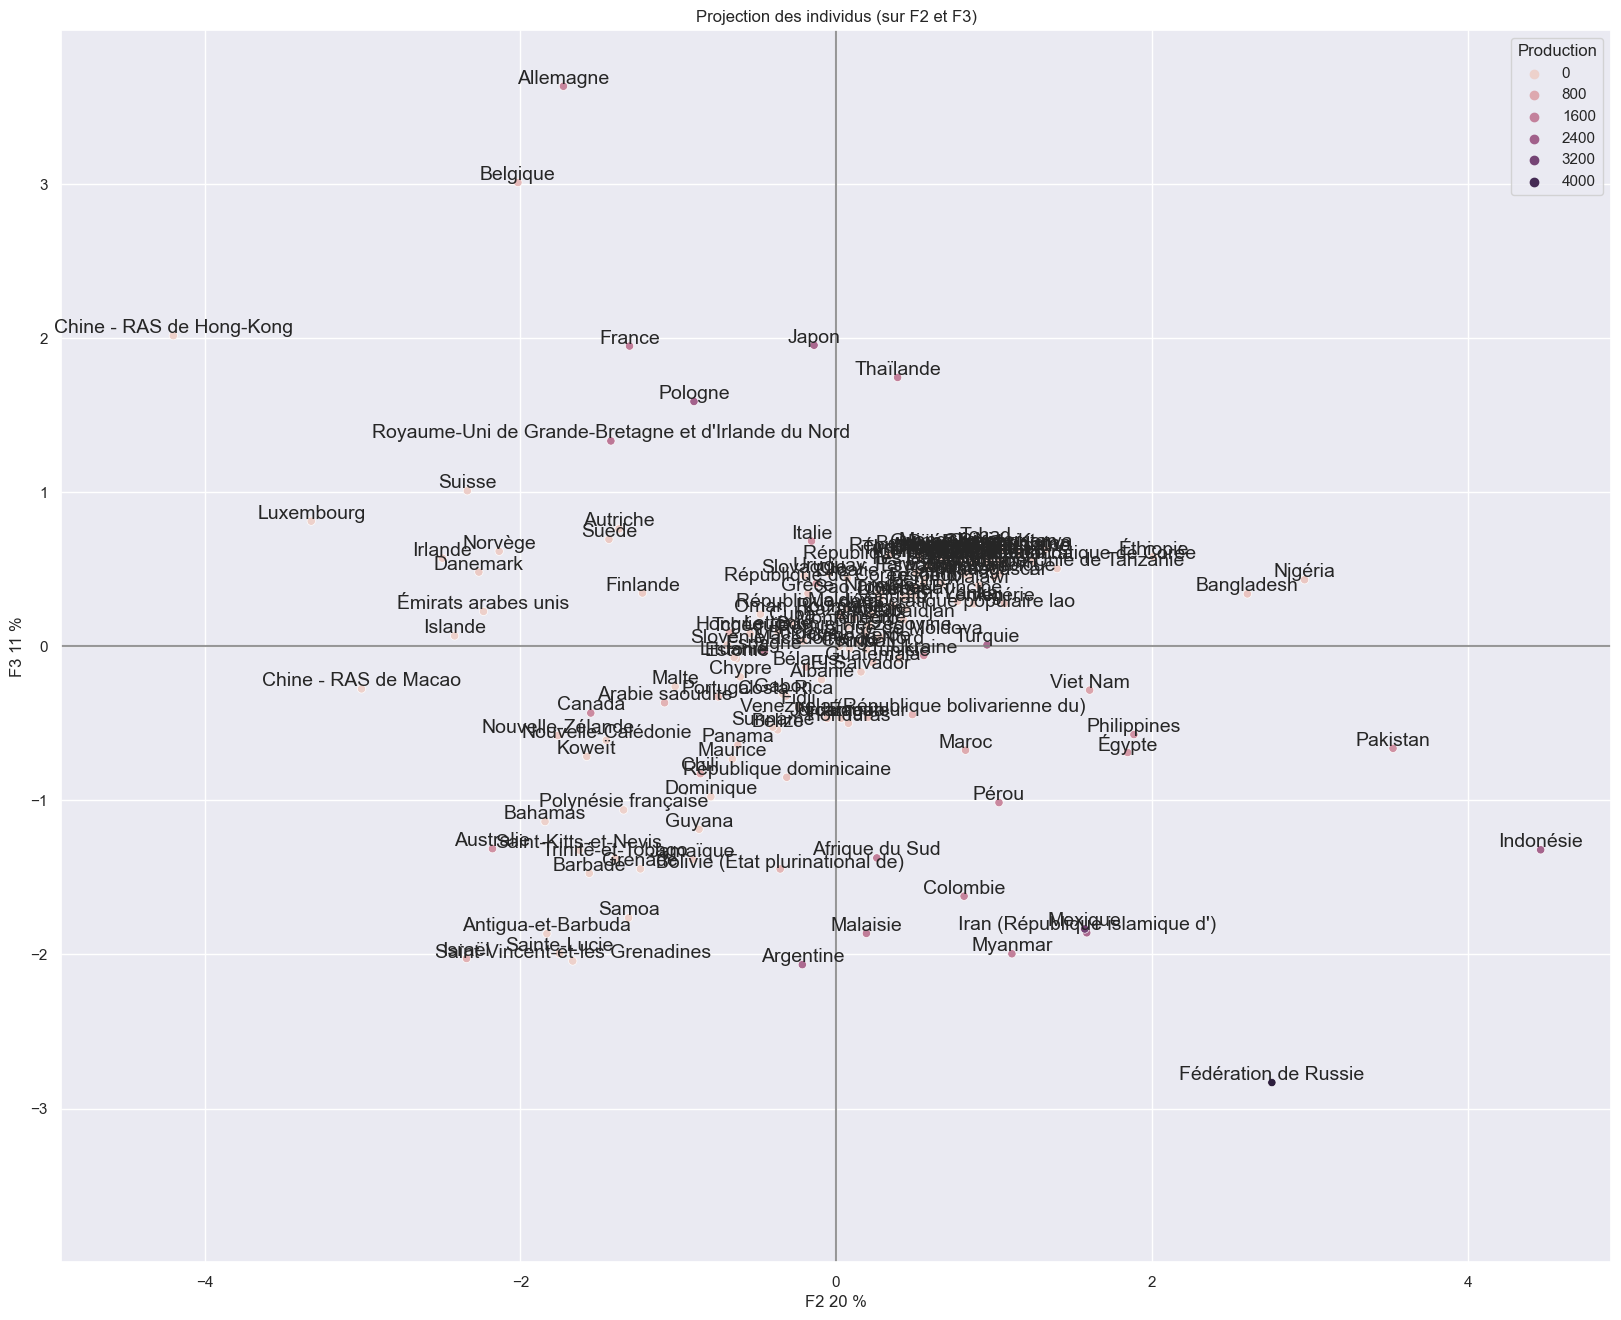

In [114]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16), clusters=df['Production'],marker="o")